In [ ]:
pip install matplotlib==3.7.3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

# Read in the housing data
df = pd.read_csv(r'C:\Users\HP\Downloads/Housing.csv')

In [2]:
# Display the first few rows
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Display summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Check for and display missing values
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values'] / df.shape[0], 3) * 100
print(nvc)

                  Total Null Values  Percentage
price                             0         0.0
area                              0         0.0
bedrooms                          0         0.0
bathrooms                         0         0.0
stories                           0         0.0
mainroad                          0         0.0
guestroom                         0         0.0
basement                          0         0.0
hotwaterheating                   0         0.0
airconditioning                   0         0.0
parking                           0         0.0
prefarea                          0         0.0
furnishingstatus                  0         0.0


In [6]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [7]:
#dataframe conversion from categorical to numeric
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [8]:
# Remove outliers
df = df_numerized
numeric_features = df.select_dtypes(include=[np.number]).columns

for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] <= (Q3 + 1.5 * IQR)) & (df[col] >= (Q1 - 1.5 * IQR))]
df = df.reset_index(drop=True)

# Display the dataframe after outlier removal
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, the dataset had {} samples.'.format(df_numerized.shape[0]))
print('After removal of outliers, the dataset now has {} samples.'.format(df.shape[0]))


Inference:
Before removal of outliers, the dataset had 545 samples.
After removal of outliers, the dataset now has 123 samples.


In [9]:
# Select numeric features for correlation analysis
numeric_features = df_numerized.select_dtypes(include=[np.number])

# Display the numeric features
numeric_features.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [10]:
# Calculate the correlation matrix
correlation_matrix = df_numerized.corr()

In [11]:
# Display the correlation matrix
df_numerized.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


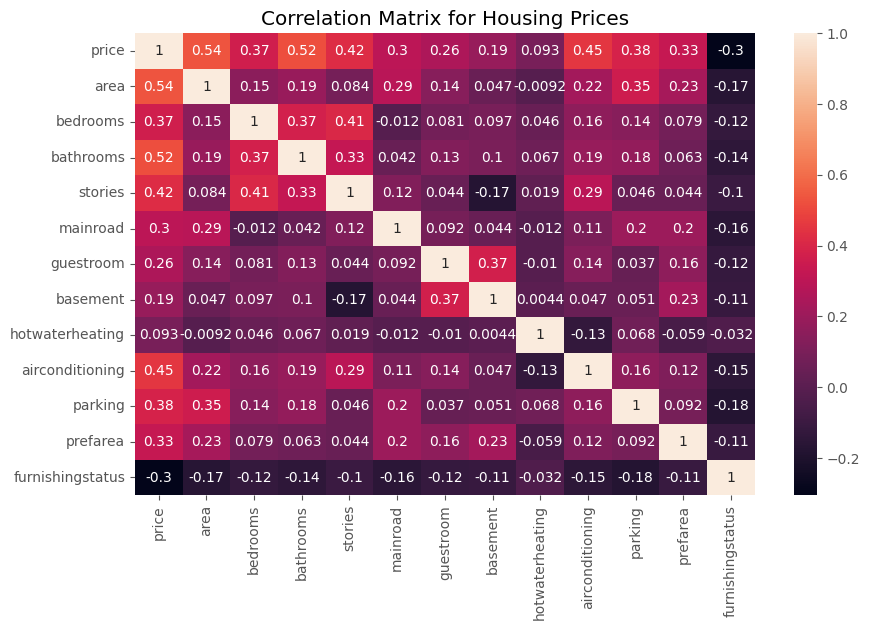

In [12]:
# Visualize the correlation matrix using a heatmap
heatmap = sns.heatmap(df_numerized.corr(), annot=True)
plt.title('Correlation Matrix for Housing Prices')
plt.show()

In [13]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

price             price               1.000000
                  area                0.535997
                  bedrooms            0.366494
                  bathrooms           0.517545
                  stories             0.420712
                                        ...   
furnishingstatus  hotwaterheating    -0.031628
                  airconditioning    -0.150477
                  parking            -0.177539
                  prefarea           -0.107686
                  furnishingstatus    1.000000
Length: 169, dtype: float64

In [14]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

furnishingstatus  price              -0.304721
price             furnishingstatus   -0.304721
parking           furnishingstatus   -0.177539
furnishingstatus  parking            -0.177539
stories           basement           -0.172394
                                        ...   
bathrooms         bathrooms           1.000000
bedrooms          bedrooms            1.000000
area              area                1.000000
prefarea          prefarea            1.000000
furnishingstatus  furnishingstatus    1.000000
Length: 169, dtype: float64

In [15]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

price             bathrooms           0.517545
bathrooms         price               0.517545
area              price               0.535997
price             area                0.535997
                  price               1.000000
guestroom         guestroom           1.000000
parking           parking             1.000000
airconditioning   airconditioning     1.000000
hotwaterheating   hotwaterheating     1.000000
basement          basement            1.000000
mainroad          mainroad            1.000000
stories           stories             1.000000
bathrooms         bathrooms           1.000000
bedrooms          bedrooms            1.000000
area              area                1.000000
prefarea          prefarea            1.000000
furnishingstatus  furnishingstatus    1.000000
dtype: float64

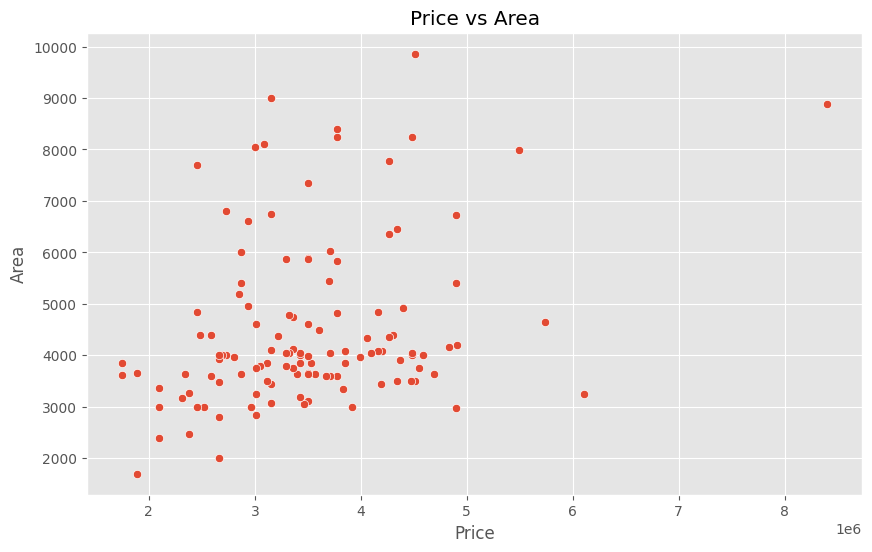

In [16]:
# Create the scatter plot with price vs area
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['area'])
plt.title('Price vs Area')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

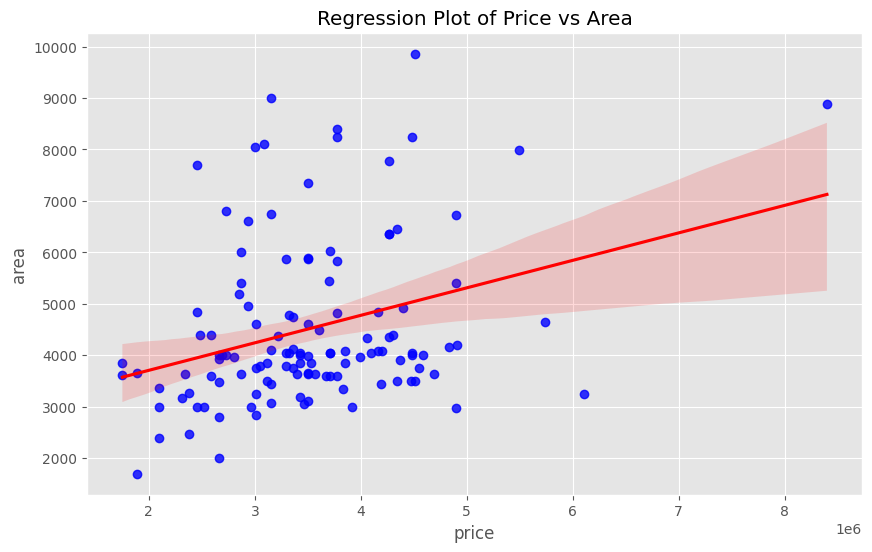

In [17]:
# Scatter plot with regression line for price vs area
sns.regplot(x='price', y='area', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Regression Plot of Price vs Area')
plt.show()

In [ ]:
#The regression line indicates that there is a positive linear relationship between price and area. The Points also suggest a strong linear relationship.